In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd .read_csv("titanic_dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.shape

(891, 12)

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
numeric_features = df.select_dtypes('int64', 'float64')
numeric_features.columns

Index(['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch'], dtype='object')

In [14]:
categorical_features = df.select_dtypes('object', 'category')
categorical_features.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

<Axes: title={'center': 'Correlation of Numeric Feature with Survived'}>

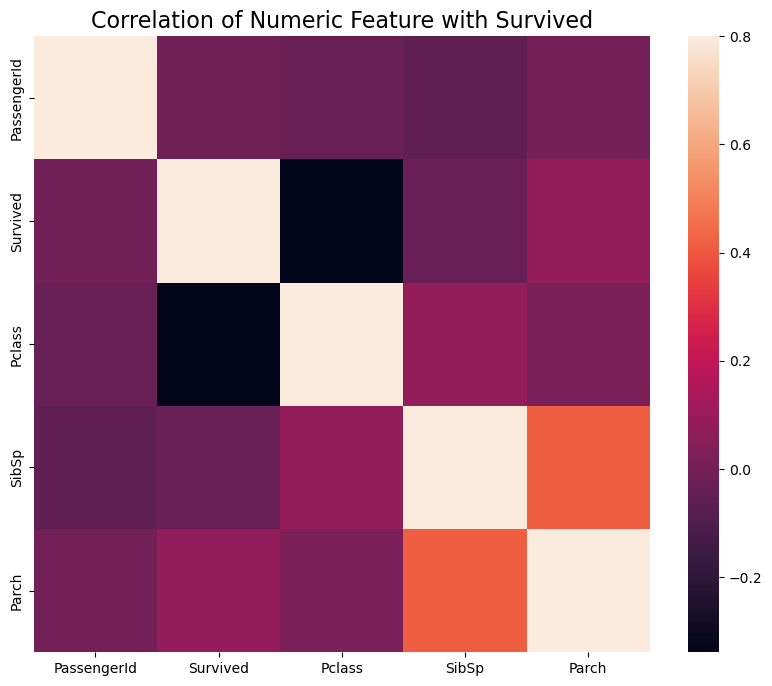

In [20]:
plt.subplots(figsize=(10,8))
correlation=numeric_features.corr()
plt.title("Correlation of Numeric Feature with Survived",y=1,size=16)
sns.heatmap(correlation,square=True,vmax=0.8)

In [16]:
k=11
cols = correlation.nlargest(k,'Survived')['Survived'].index
print(cols)

Index(['Survived', 'Parch', 'PassengerId', 'SibSp', 'Pclass'], dtype='object')


<Axes: >

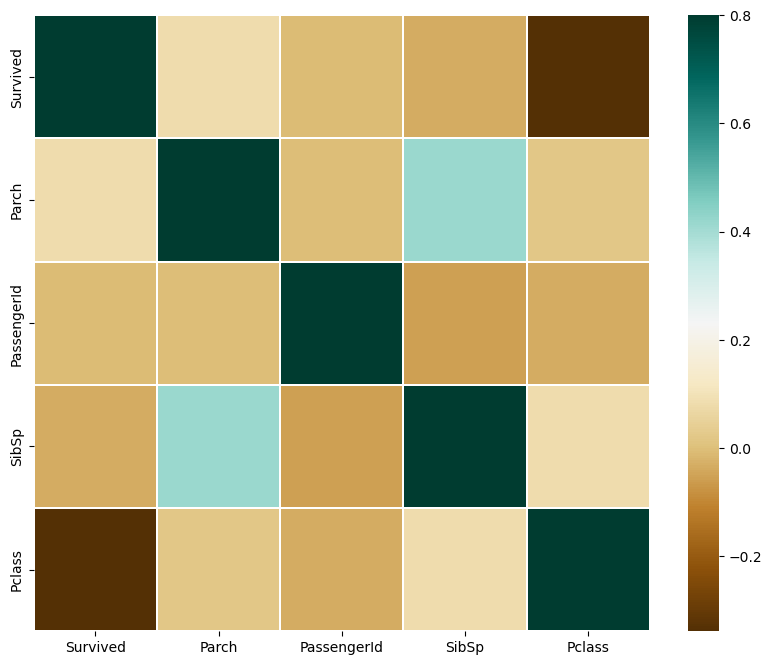

In [21]:
cm = np.corrcoef(df[cols].values.T)
f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cm,vmax=.8,linewidths=0.01,square=True,cmap="BrBG",
            linecolor="white",xticklabels=cols.values,annot_kws={'size':12},yticklabels=cols.values)

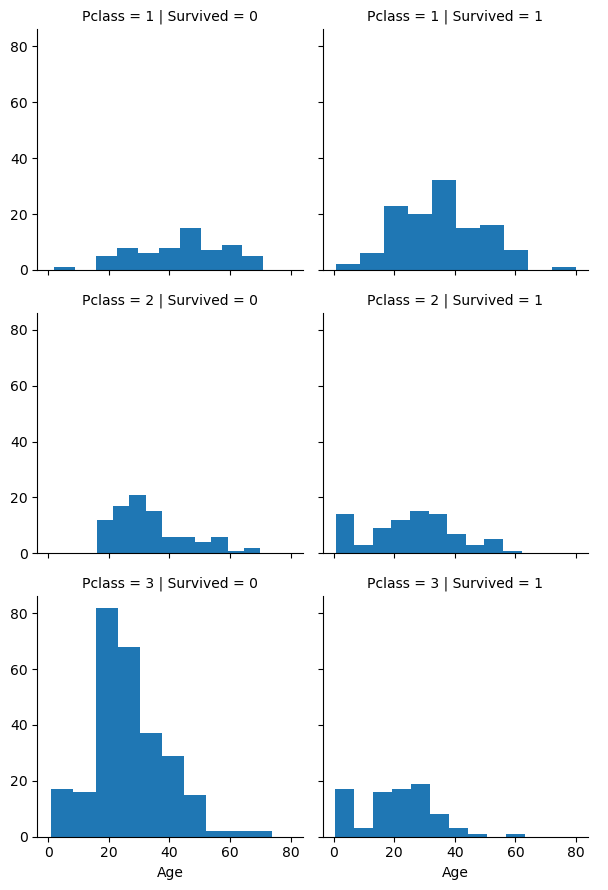

In [24]:
g=sns.FacetGrid(df,col="Survived",row="Pclass")
g.map(plt.hist,"Age")
g.add_legend()
plt.show()

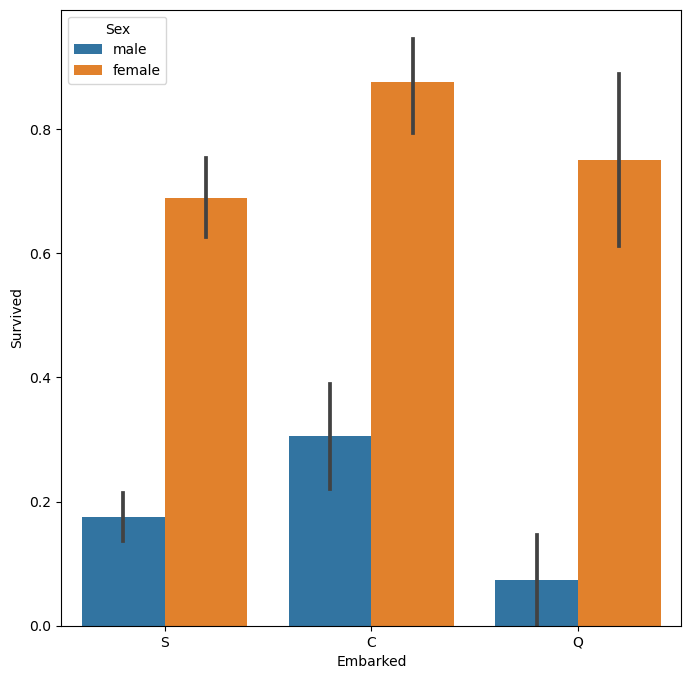

In [25]:
plt.figure(figsize=(8,8))
sns.barplot(x="Embarked",y="Survived",hue="Sex",data=df)
plt.show()

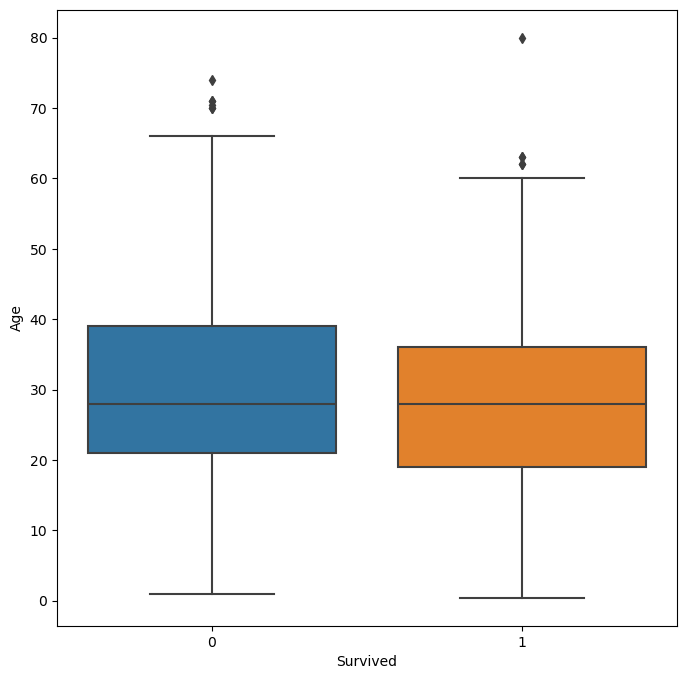

In [26]:
plt.figure(figsize=(8,8))
sns.boxplot(x="Survived",y="Age",data=df)
plt.show()

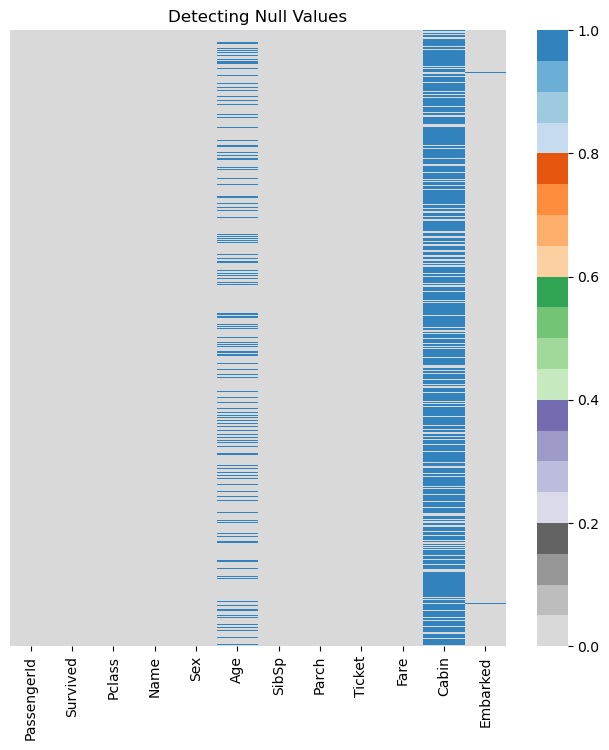

In [27]:
plt.figure(figsize=(8,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap="tab20c_r")
plt.title("Detecting Null Values")
plt.show()

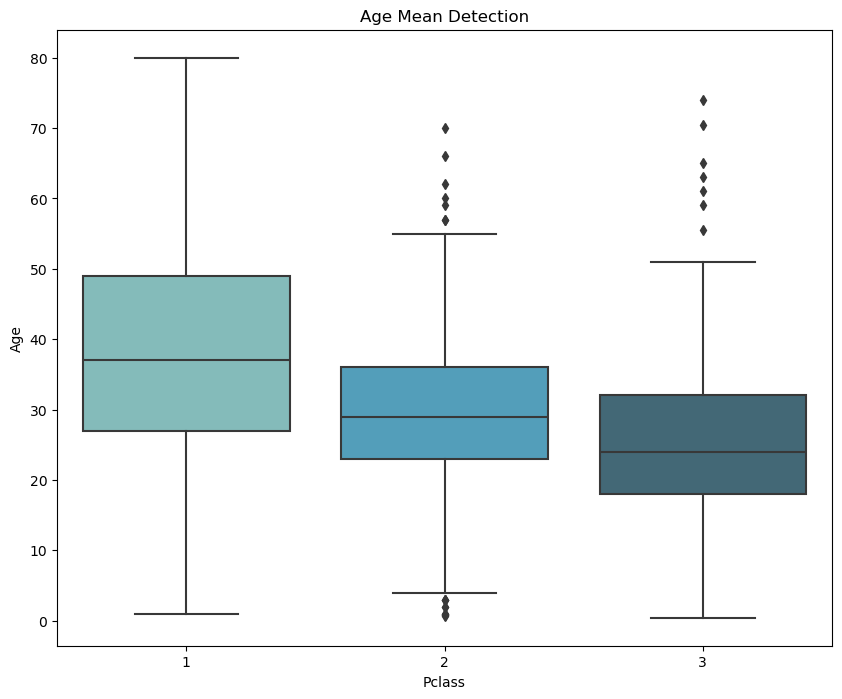

In [28]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Pclass",y="Age",data=df,palette="GnBu_d")
plt.title("Age Mean Detection")
plt.show()

In [29]:
def impute_age(cols):
    
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37

        elif Pclass==2:
            return 29

        else:
            return 25

    else:
        return Age

df["Age"]=df[["Age","Pclass"]].apply(impute_age,axis=1)

C:\Users\Laptop\AppData\Local\Temp\ipykernel_12740\788370534.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\Laptop\AppData\Local\Temp\ipykernel_12740\788370534.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


In [31]:
df.drop("Cabin",axis=1,inplace=True)

In [33]:
df.dropna(inplace=True)

In [35]:
df.shape

(889, 11)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB
